# DATA CLEANING

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud, STOPWORDS

In [ ]:
tweets = pd.read_csv("tweets.csv")
df = pd.DataFrame(tweets)
df.head()

D:\anaconda\envs\py37redone\lib\site-packages\IPython\core\interactiveshell.py:3437: DtypeWarning: Columns (0,1,2,3,4,5,6,7,11,12,13,14,15,16,17,18) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Datetime,Tweet Id,Text,Username,Permalink,User,Outlinks,CountLinks,ReplyCount,RetweetCount,LikeCount,QuoteCount,ConversationId,Language,Source,Media,QuotedTweet,MentionedUsers,hashtag,hastag_counts
0,2022-02-24 03:12:47+00:00,1496684505247141888.0,🇺🇦 Massive explosions rocks #Kharkiv. #Russia ...,IdeologyWars,https://twitter.com/IdeologyWars/status/149668...,https://twitter.com/IdeologyWars,NaN,NaN,2.0,17.0,47.0,1.0,1496493071495987200.0,en,"<a href=""https://mobile.twitter.com"" rel=""nofo...",[Photo(previewUrl='https://pbs.twimg.com/media...,NaN,NaN,"['#Kharkiv.', '#Russia', '#Ukraine', '#Ukraine...",9.0
1,2022-02-24 03:18:54+00:00,1496686044275695616.0,🇺🇦 Kharkiv is officially being struck by major...,IdeologyWars,https://twitter.com/IdeologyWars/status/149668...,https://twitter.com/IdeologyWars,NaN,NaN,2.0,104.0,188.0,8.0,1496493071495987200.0,en,"<a href=""https://mobile.twitter.com"" rel=""nofo...",[Video(thumbnailUrl='https://pbs.twimg.com/ext...,NaN,NaN,"['#Russia', '#Ukraine', '#UkraineWar', '#Russi...",8.0
2,2022-02-24 03:22:42+00:00,1496687000375726080.0,🇺🇦 More angles on that strike in Kharkiv. #Rus...,IdeologyWars,https://twitter.com/IdeologyWars/status/149668...,https://twitter.com/IdeologyWars,NaN,NaN,1.0,41.0,75.0,5.0,1496493071495987200.0,en,"<a href=""https://mobile.twitter.com"" rel=""nofo...",[Video(thumbnailUrl='https://pbs.twimg.com/ext...,NaN,NaN,"['#Russia', '#Ukraine', '#UkraineWar', '#Russi...",8.0
3,2022-02-24 03:25:36+00:00,1496687731434565632.0,🇺🇦 BM-21 Grad strikes opening on #Mariupol cit...,IdeologyWars,https://twitter.com/IdeologyWars/status/149668...,https://twitter.com/IdeologyWars,NaN,NaN,21.0,407.0,1099.0,149.0,1496493071495987200.0,en,"<a href=""https://mobile.twitter.com"" rel=""nofo...",[Video(thumbnailUrl='https://pbs.twimg.com/ext...,NaN,NaN,"['#Mariupol', '#Russia', '#Ukraine', '#Ukraine...",9.0
4,2022-02-24 03:27:28+00:00,1496688201242759168.0,🇺🇦 Damage caused by strike in Kharkiv... #Russ...,IdeologyWars,https://twitter.com/IdeologyWars/status/149668...,https://twitter.com/IdeologyWars,NaN,NaN,7.0,152.0,207.0,22.0,1496493071495987200.0,en,"<a href=""https://mobile.twitter.com"" rel=""nofo...",[Video(thumbnailUrl='https://pbs.twimg.com/ext...,NaN,NaN,"['#Russia', '#Ukraine', '#UkraineWar', '#Russi...",8.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399856 entries, 0 to 399855
Data columns (total 20 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Datetime        236016 non-null  object 
 1   Tweet Id        90892 non-null   object 
 2   Text            90892 non-null   object 
 3   Username        44070 non-null   object 
 4   Permalink       44070 non-null   object 
 5   User            44070 non-null   object 
 6   Outlinks        20958 non-null   object 
 7   CountLinks      20958 non-null   object 
 8   ReplyCount      44070 non-null   float64
 9   RetweetCount    44070 non-null   float64
 10  LikeCount       44070 non-null   float64
 11  QuoteCount      44070 non-null   object 
 12  ConversationId  44070 non-null   object 
 13  Language        44066 non-null   object 
 14  Source          44066 non-null   object 
 15  Media           13299 non-null   object 
 16  QuotedTweet     7743 non-null    object 
 17  MentionedU

In [ ]:
# select only the rows whose tweets are in English
df = df.loc[df["Language"]=="en"]
# reset index
df.reset_index(inplace=True, drop=True)

In [ ]:
df["Text"].head(10)

0    🇺🇦 Massive explosions rocks #Kharkiv. #Russia ...
1    🇺🇦 Kharkiv is officially being struck by major...
2    🇺🇦 More angles on that strike in Kharkiv. #Rus...
3    🇺🇦 BM-21 Grad strikes opening on #Mariupol cit...
4    🇺🇦 Damage caused by strike in Kharkiv... #Russ...
5    🇺🇦 BORYSPIL AIRPORT IN #KYIV IS UNDER ATTACK. ...
6    🇺🇦 BORYSPIL AIRPORT IN #KYIV IS UNDER ATTACK. ...
7    Statement from President Biden\n\n#Russia #Ukr...
8    🇺🇦 Air raid sirens are apparently in #Kyiv. #R...
9    🇺🇦 Mariupol right now. #Russia #Ukraine #Ukrai...
Name: Text, dtype: object

In [ ]:
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=UserWarning)

# Lowercase everything
df["lowered_text"] = df['Text'].str.lower()
df

,Datetime,Tweet Id,Text,Username,Permalink,User,Outlinks,CountLinks,ReplyCount,RetweetCount,...,QuoteCount,ConversationId,Language,Source,Media,QuotedTweet,MentionedUsers,hashtag,hastag_counts,lowered_text
0,2022-02-24 03:12:47+00:00,1496684505247141888.0,🇺🇦 Massive explosions rocks #Kharkiv. #Russia ...,IdeologyWars,https://twitter.com/IdeologyWars/status/149668...,https://twitter.com/IdeologyWars,NaN,NaN,2.0,17.0,...,1.0,1496493071495987200.0,en,"<a href=""https://mobile.twitter.com"" rel=""nofo...",[Photo(previewUrl='https://pbs.twimg.com/media...,NaN,NaN,"['#Kharkiv.', '#Russia', '#Ukraine', '#Ukraine...",9.0,🇺🇦 massive explosions rocks #kharkiv. #russia ...
1,2022-02-24 03:18:54+00:00,1496686044275695616.0,🇺🇦 Kharkiv is officially being struck by major...,IdeologyWars,https://twitter.com/IdeologyWars/status/149668...,https://twitter.com/IdeologyWars,NaN,NaN,2.0,104.0,...,8.0,1496493071495987200.0,en,"<a href=""https://mobile.twitter.com"" rel=""nofo...",[Video(thumbnailUrl='https://pbs.twimg.com/ext...,NaN,NaN,"['#Russia', '#Ukraine', '#UkraineWar', '#Russi...",8.0,🇺🇦 kharkiv is officially being struck by major...
2,2022-02-24 03:22:42+00:00,1496687000375726080.0,🇺🇦 More angles on that strike in Kharkiv. #Rus...,IdeologyWars,https://twitter.com/IdeologyWars/status/149668...,https://twitter.com/IdeologyWars,NaN,NaN,1.0,41.0,...,5.0,1496493071495987200.0,en,"<a href=""https://mobile.twitter.com"" rel=""nofo...",[Video(thumbnailUrl='https://pbs.twimg.com/ext...,NaN,NaN,"['#Russia', '#Ukraine', '#UkraineWar', '#Russi...",8.0,🇺🇦 more angles on that strike in kharkiv. #rus...
3,2022-02-24 03:25:36+00:00,1496687731434565632.0,🇺🇦 BM-21 Grad strikes opening on #Mariupol cit...,IdeologyWars,https://twitter.com/IdeologyWars/status/149668...,https://twitter.com/IdeologyWars,NaN,NaN,21.0,407.0,...,149.0,1496493071495987200.0,en,"<a href=""https://mobile.twitter.com"" rel=""nofo...",[Video(thumbnailUrl='https://pbs.twimg.com/ext...,NaN,NaN,"['#Mariupol', '#Russia', '#Ukraine', '#Ukraine...",9.0,🇺🇦 bm-21 grad strikes opening on #mariupol cit...
4,2022-02-24 03:27:28+00:00,1496688201242759168.0,🇺🇦 Damage caused by strike in Kharkiv... #Russ...,IdeologyWars,https://twitter.com/IdeologyWars/status/149668...,https://twitter.com/IdeologyWars,NaN,NaN,7.0,152.0,...,22.0,1496493071495987200.0,en,"<a href=""https://mobile.twitter.com"" rel=""nofo...",[Video(thumbnailUrl='https://pbs.twimg.com/ext...,NaN,NaN,"['#Russia', '#Ukraine', '#UkraineWar', '#Russi...",8.0,🇺🇦 damage caused by strike in kharkiv... #russ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25710,2022-03-27 23:59:21+00:00,1508232236985892869,#Biden Confirms Why the #US #Needed This #War:...,OccupySchagen,https://twitter.com/OccupySchagen/status/15082...,https://twitter.com/OccupySchagen,['https://consortiumnews.com/2022/03/27/can-ru...,['https://t.co/HMtKuuaKE1'],0.0,1.0,...,0,1508232236985892869,en,"<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,NaN,NaN,"['#Biden', '#US', '#Needed', '#War:', '#Ultima...",13.0,#biden confirms why the #us #needed this #war:...
25711,2022-03-27 23:59:26+00:00,1508232259266043905,Remember this?\nSviatlana #tsikhanouskaya: You...,Sasha52114265,https://twitter.com/Sasha52114265/status/15082...,https://twitter.com/Sasha52114265,['https://youtu.be/nm8yY8ws-VY'],['https://t.co/zO7rvaWBpc'],0.0,0.0,...,0,1508232259266043905,en,"<a href=""http://twitter.com/download/android"" ...",NaN,NaN,"[User(username='YouTube', id=10228272, display...","['#tsikhanouskaya:', '#putin', '#PutinIsaWarCr...",5.0,remember this?\nsviatlana #tsikhanouskaya: you...
25712,2022-03-27 23:59:26+00:00,1508232258037112834,Russia’s mass media and telecommunications wat...,RenKeNews,https://twitter.com/RenKeNews/status/150823225...,https://twitter.com/RenKeNews,['https://tass.com/world/1428013'],['https://t.co/6Ukollhqfj'],1.0,0.0,...,0,1508232258037112834,en,"<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,NaN,NaN,"['#Russ

In [ ]:
# remove url, @, and punctuation.
import re
def remove_url(text):
    urlfree = re.sub(r'http\S+', '', text)
    return urlfree

df['url_free'] = df['lowered_text'].apply(lambda x:remove_url(x))

In [ ]:
def remove_at(text):
  at_free = re.sub(r'@\S+', '', text)
  return at_free

df['at_free'] = df['url_free'].apply(lambda x:remove_at(x))

In [ ]:
import string
def remove_punctuation(text):
    punctuationfree="".join([i for i in text if i not in string.punctuation])
    return punctuationfree

df['cleaned_text'] = df['at_free'].apply(lambda x:remove_punctuation(x))
df.head(10)

,Datetime,Tweet Id,Text,Username,Permalink,User,Outlinks,CountLinks,ReplyCount,RetweetCount,...,Source,Media,QuotedTweet,MentionedUsers,hashtag,hastag_counts,lowered_text,url_free,at_free,cleaned_text
0,2022-02-24 03:12:47+00:00,1496684505247141888.0,🇺🇦 Massive explosions rocks #Kharkiv. #Russia ...,IdeologyWars,https://twitter.com/IdeologyWars/status/149668...,https://twitter.com/IdeologyWars,NaN,NaN,2.0,17.0,...,"<a href=""https://mobile.twitter.com"" rel=""nofo...",[Photo(previewUrl='https://pbs.twimg.com/media...,NaN,NaN,"['#Kharkiv.', '#Russia', '#Ukraine', '#Ukraine...",9.0,🇺🇦 massive explosions rocks #kharkiv. #russia ...,🇺🇦 massive explosions rocks #kharkiv. #russia ...,🇺🇦 massive explosions rocks #kharkiv. #russia ...,🇺🇦 massive explosions rocks kharkiv russia ukr...
1,2022-02-24 03:18:54+00:00,1496686044275695616.0,🇺🇦 Kharkiv is officially being struck by major...,IdeologyWars,https://twitter.com/IdeologyWars/status/149668...,https://twitter.com/IdeologyWars,NaN,NaN,2.0,104.0,...,"<a href=""https://mobile.twitter.com"" rel=""nofo...",[Video(thumbnailUrl='https://pbs.twimg.com/ext...,NaN,NaN,"['#Russia', '#Ukraine', '#UkraineWar', '#Russi...",8.0,🇺🇦 kharkiv is officially being struck by major...,🇺🇦 kharkiv is officially being struck by major...,🇺🇦 kharkiv is officially being struck by major...,🇺🇦 kharkiv is officially being struck by major...
2,2022-02-24 03:22:42+00:00,1496687000375726080.0,🇺🇦 More angles on that strike in Kharkiv. #Rus...,IdeologyWars,https://twitter.com/IdeologyWars/status/149668...,https://twitter.com/IdeologyWars,NaN,NaN,1.0,41.0,...,"<a href=""https://mobile.twitter.com"" rel=""nofo...",[Video(thumbnailUrl='https://pbs.twimg.com/ext...,NaN,NaN,"['#Russia', '#Ukraine', '#UkraineWar', '#Russi...",8.0,🇺🇦 more angles on that strike in kharkiv. #rus...,🇺🇦 more angles on that strike in kharkiv. #rus...,🇺🇦 more angles on that strike in kharkiv. #rus...,🇺🇦 more angles on that strike in kharkiv russi...
3,2022-02-24 03:25:36+00:00,1496687731434565632.0,🇺🇦 BM-21 Grad strikes opening on #Mariupol cit...,IdeologyWars,https://twitter.com/IdeologyWars/status/149668...,https://twitter.com/IdeologyWars,NaN,NaN,21.0,407.0,...,"<a href=""https://mobile.twitter.com"" rel=""nofo...",[Video(thumbnailUrl='https://pbs.twimg.com/ext...,NaN,NaN,"['#Mariupol', '#Russia', '#Ukraine', '#Ukraine...",9.0,🇺🇦 bm-21 grad strikes opening on #mariupol cit...,🇺🇦 bm-21 grad strikes opening on #mariupol cit...,🇺🇦 bm-21 grad strikes opening on #mariupol cit...,🇺🇦 bm21 grad strikes opening on mariupol city ...
4,2022-02-24 03:27:28+00:00,1496688201242759168.0,🇺🇦 Damage caused by strike in Kharkiv... #Russ...,IdeologyWars,https://twitter.com/IdeologyWars/status/149668...,https://twitter.com/IdeologyWars,NaN,NaN,7.0,152.0,...,"<a href=""https://mobile.twitter.com"" rel=""nofo...",[Video(thumbnailUrl='https://pbs.twimg.com/ext...,NaN,NaN,"['#Russia', '#Ukraine', '#UkraineWar', '#Russi...",8.0,🇺🇦 damage caused by strike in kharkiv... #russ...,🇺🇦 damage caused by strike in kharkiv... #russ...,🇺🇦 damage caused by strike in kharkiv... #russ...,🇺🇦 damage caused by strike in kharkiv russia u...
5,2022-02-24 03:31:18+00:00,1496689162715648000.0,🇺🇦 BORYSPIL AIRPORT IN #KYIV IS UNDER ATTACK. ...,IdeologyWars,https://twitter.com/IdeologyWars/status/149668...,https://twitter.com/IdeologyWars,NaN,NaN,1.0,19.0,...,"<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,NaN,NaN,"['#KYIV', '#Russia', '#Ukraine', '#UkraineWar'...",9.0,🇺🇦 boryspil airport in #kyiv is under attack. ...,🇺🇦 boryspil airport in #kyiv is under attack. ...,🇺🇦 boryspil airport in #kyiv is under attack. ...,🇺🇦 boryspil airport in kyiv is under attack r...
6,2022-02-24 03:31:35+00:00,1496689234299789312.0,🇺🇦 BORYSPIL AIRPORT IN #KYIV IS UNDER ATTACK. ...,MalikRoxk,https://twitter.com/MalikRoxk/status/149668923...,https://twitter.com/MalikRoxk,NaN,NaN,0.0,7.0,...,"<a href=""http://twitter.com/download/android"" ...",NaN,NaN,NaN,"['#KYIV', '#Russia', '#Ukraine', '#UkraineWar'...

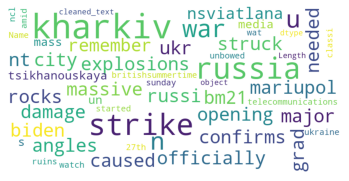

In [ ]:
stopwords_set = set(STOPWORDS)
wordcloud = WordCloud(background_color='white',
                     stopwords = stopwords_set,
                      max_words = 300,
                      max_font_size = 40,
                      scale = 2,
                      random_state=42
                     ).generate(str(df['cleaned_text']))

print(wordcloud)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [ ]:
#4. tokenize the text
import nltk
from nltk.tokenize import word_tokenize

#Stop words present in the library

nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('english')

import string
def remove_punctuation(text):
    punctuationfree="".join([i for i in text if i not in string.punctuation])
    return punctuationfree

# we remove all punctuations from text, so we need to remove punctuations from the stopword list as well 

stop_series=pd.Series(stopwords)
stopwords_new=stop_series.apply(lambda x:remove_punctuation(x))
stopwords_new=list(stopwords_new)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\zhuocheng\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
#tokenize the text
from nltk.tokenize import word_tokenize
nltk.download('punkt')
df['tokenied_text']= df['cleaned_text'].apply(lambda x: word_tokenize(x))

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\zhuocheng\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
#remove stopwords from tokenized text
#defining the function to remove stopwords from tokenized text

def remove_stopwords(text):
    output= [i for i in text if i not in stopwords_new]
    return output

df['no_stopwords']= df['tokenied_text'].apply(lambda x:remove_stopwords(x))

In [ ]:
# compared to steming, lemmatizing will not change the meaning of the words.
# lemmatizing no_stopwords

from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

import nltk
nltk.download('omw-1.4')

wordnet_lemmatizer = WordNetLemmatizer()

def lemmatizer(text):
    lemm_text = [wordnet_lemmatizer.lemmatize(word) for word in text]
    return lemm_text

df['lemmatized_text']=df['no_stopwords'].apply(lambda x:lemmatizer(x)) 

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\zhuocheng\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\zhuocheng\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [ ]:
#detokenize the words
from nltk.tokenize.treebank import TreebankWordDetokenizer

df['detokenized_text']=df['lemmatized_text'].apply(lambda x:TreebankWordDetokenizer().detokenize(x))

In [ ]:
df['detokenized_text'].head(10)

0    🇺🇦 massive explosion rock kharkiv russia ukrai...
1    🇺🇦 kharkiv officially struck major strike russ...
2    🇺🇦 angle strike kharkiv russia ukraine ukraine...
3    🇺🇦 bm21 grad strike opening mariupol city russ...
4    🇺🇦 damage caused strike kharkiv russia ukraine...
5    🇺🇦 boryspil airport kyiv attack russia ukraine...
6    🇺🇦 boryspil airport kyiv attack russia ukraine...
7    statement president biden russia ukraine ukrai...
8    🇺🇦 air raid siren apparently kyiv russia ukrai...
9    🇺🇦 mariupol right russia ukraine ukrainewar ru...
Name: detokenized_text, dtype: object

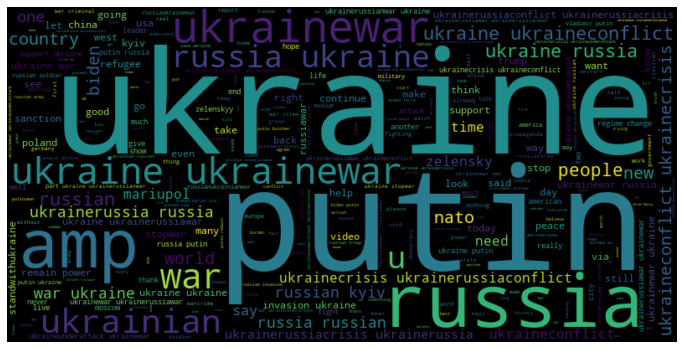

In [ ]:
text = " ".join(tweet for tweet in df["detokenized_text"])
wc = WordCloud(width=800, height=400, max_words=300).generate(text)
plt.figure(figsize=(12,10))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

# EVALUATE WITH XGBOOST

In [ ]:
import pandas as pd
import xgboost as xgb
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [ ]:
df_feature = pd.read_csv('df_feature.csv',index_col=0)
df_clean = pd.read_csv('df_clean.csv',index_col=0)

In [ ]:
X=df_feature
y=df_clean['label']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=2)

In [ ]:
clf_xgb = xgb.XGBClassifier(max_depth = 15)

In [ ]:
# train the model using the training set and make predictions on testing set

clf_xgb.fit(X_train, y_train)
y_pred_xgb = clf_xgb.predict(X_test) 

# output the confusion matrix and classification report

cnf_xgb = metrics.confusion_matrix(y_test, y_pred_xgb)

print(cnf_xgb)
print(classification_report(y_test, y_pred_xgb, digits=6))

[[ 48697   5111]
 [ 11056 100254]]
              precision    recall  f1-score   support

           0   0.814972  0.905014  0.857636     53808
           1   0.951492  0.900674  0.925386    111310

    accuracy                       0.902088    165118
   macro avg   0.883232  0.902844  0.891511    165118
weighted avg   0.907004  0.902088  0.903308    165118

Wall time: 1min 23s


In [ ]:
# Take the 250 feature names from part 1
vocabulary = ['10', '100', '2016', 'also', 'always', 'amazing', 'amp', 'another',
       'art', 'as', 'awesome', 'baby', 'back', 'bad', 'bday', 'beautiful',
       'believe', 'best', 'better', 'big', 'birthday', 'bitch', 'black',
       'blessed', 'book', 'boy', 'call', 'cant', 'check', 'child',
       'christmas', 'come', 'coming', 'congrats', 'congratulation',
       'cook', 'cool', 'could', 'cry', 'cute', 'damn', 'day', 'dead',
       'deal', 'death', 'die', 'dog', 'done', 'encounter', 'enjoy',
       'even', 'ever', 'every', 'everyone', 'everything', 'excited',
       'face', 'family', 'fan', 'fantastic', 'favorite', 'feel',
       'feeling', 'finally', 'find', 'first', 'follow', 'food', 'forget',
       'found', 'free', 'friday', 'friend', 'fuck', 'fucking', 'full',
       'fun', 'funny', 'game', 'get', 'getting', 'gift', 'girl', 'give',
       'go', 'god', 'going', 'gonna', 'good', 'gorgeous', 'got', 'great',
       'guy', 'happy', 'hard', 'hate', 'he', 'heart', 'help', 'here',
       'home', 'hope', 'hot', 'htt', 'im', 'ive', 'job', 'join', 'keep',
       'kid', 'kill', 'know', 'last', 'let', 'life', 'like', 'little',
       'live', 'local', 'lol', 'long', 'look', 'looking', 'lot', 'love',
       'loved', 'lovely', 'loving', 'luck', 'made', 'make', 'making',
       'man', 'many', 'may', 'meet', 'miss', 'mom', 'moment', 'monster',
       'morning', 'movie', 'much', 'music', 'must', 'nationaldogday',
       'need', 'never', 'new', 'news', 'next', 'nice', 'night', 'oh',
       'old', 'omg', 'one', 'part', 'people', 'perfect', 'person',
       'photo', 'pic', 'picture', 'place', 'play', 'please', 'post',
       'pretty', 'proud', 'quote', 'read', 'ready', 'real', 'really',
       'reason', 'right', 'rt', 'sad', 'sail', 'say', 'school', 'sea',
       'season', 'see', 'set', 'sexy', 'shit', 'show', 'sign', 'smile',
       'snailgiants', 'someone', 'something', 'song', 'sorry', 'start',
       'still', 'stop', 'story', 'super', 'support', 'sweet', 'take',
       'team', 'tell', 'thank', 'thankful', 'thanks', 'thanksgiving',
       'thats', 'thing', 'think', 'time', 'today', 'tomorrow', 'tonight',
       'top', 'transponder', 'trecru', 'trump', 'try', 'twitter', 'two',
       'ur', 'via', 'video', 'vote', 'wait', 'want', 'watch', 'way',
       'week', 'weekend', 'welcome', 'well', 'win', 'winter', 'wish',
       'without', 'woman', 'wonderful', 'work', 'world', 'would', 'wow',
       'wrong', 'yall', 'year', 'yes']

In [ ]:
docs = list(df['detokenized_text'])

In [ ]:
#Now produce tf idf matrix of given BoW
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
cv = CountVectorizer(vocabulary = vocabulary)
word_count_vector = cv.fit_transform(docs)

tf = pd.DataFrame(word_count_vector.toarray(), columns = vocabulary)
tf

,10,100,2016,also,always,amazing,amp,another,art,as,...,woman,wonderful,work,world,would,wow,wrong,yall,year,yes
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25710,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25711,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25712,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25713,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
tfidf_transformer = TfidfTransformer()
X = tfidf_transformer.fit_transform(word_count_vector)

idf = pd.DataFrame({'feature_name': vocabulary, 'idf_weights':tfidf_transformer.idf_})
idf

,feature_name,idf_weights
0,10,6.559749
1,100,6.401278
2,2016,7.628508
3,also,4.993661
4,always,5.907845
...,...,...
245,wow,7.543951
246,wrong,6.117916
247,yall,9.208958
248,year,5.188722


In [ ]:
tf_idf = pd.DataFrame(X.toarray() ,columns=vocabulary)
tf_idf

,10,100,2016,also,always,amazing,amp,another,art,as,...,woman,wonderful,work,world,would,wow,wrong,yall,year,yes
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25710,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25711,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25712,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25713,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# prediction of clf_xgb
tw_pred = clf_xgb.predict(tf_idf)
tw_pred = pd.DataFrame(tw_pred, columns=['prediction_by_xgb'])

In [ ]:
# final df
final = pd.concat([df['detokenized_text'], tw_pred], axis=1)
final['full_text'] = df['Text']
final

,detokenized_text,prediction_by_xgb,full_text
0,🇺🇦 massive explosion rock kharkiv russia ukrai...,0,🇺🇦 Massive explosions rocks #Kharkiv. #Russia ...
1,🇺🇦 kharkiv officially struck major strike russ...,0,🇺🇦 Kharkiv is officially being struck by major...
2,🇺🇦 angle strike kharkiv russia ukraine ukraine...,0,🇺🇦 More angles on that strike in Kharkiv. #Rus...
3,🇺🇦 bm21 grad strike opening mariupol city russ...,0,🇺🇦 BM-21 Grad strikes opening on #Mariupol cit...
4,🇺🇦 damage caused strike kharkiv russia ukraine...,0,🇺🇦 Damage caused by strike in Kharkiv... #Russ...
...,...,...,...
25710,biden confirms u needed war president united s...,1,#Biden Confirms Why the #US #Needed This #War:...
25711,remember sviatlana tsikhanouskaya understand n...,0,Remember this?\nSviatlana #tsikhanouskaya: You...
25712,russia ’ mass medium telecommunication watchdo...,0,Russia’s mass media and telecommunications wat...
25713,watch amid war ruin ukraine unbowed classical ...,0,"Watch: amid war ruins in #Ukraine, unbowed cla..."


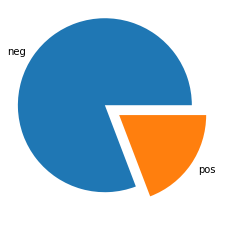

In [ ]:
import matplotlib.pyplot as plt
mylabels = ['neg', 'pos']
myexplode = [0.2, 0]
plt.pie(final['prediction_by_xgb'].value_counts(), labels = mylabels, explode = myexplode)

plt.show()